## __Dimensionality Reduction and Clustering__

### __*Analysis of Data*__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

For the following assignment I used the procedure listed below:

1. Understand the problem.
2. Analyze the data (See if there are any missing variables etc..)
3. Clean the data (If data cleanin is needed)
4. Apply models (PSA, TSNE, K-means clustering, Hierarchical clustering) 

In [3]:
# import the data
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Before using any models I felt it was right, just like all the other assignments to see what our data looks like.

In [4]:
X.shape

(70000, 784)

In [5]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

This project doesn't really seem to require any datacleaning since we are just dealing with a array of numbers so lets move on to the PCA. We can plot a graph can help us see how many components we should use to describe the most % of explained variance.

# 1. PCA

Text(0.5, 1.0, 'Explained Variance by Components')

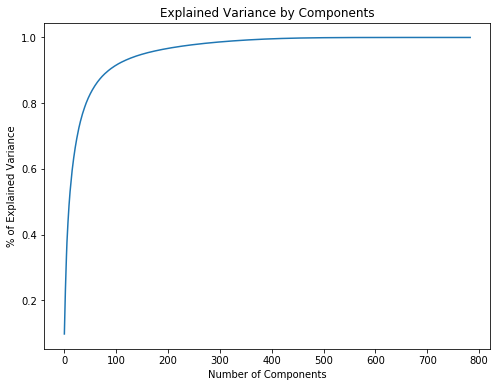

In [6]:
pca = PCA()
x_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)

f, ax = plt.subplots(figsize=(8,6))
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.ylabel('% of Explained Variance')
plt.xlabel('Number of Components')
plt.title('Explained Variance by Components')

A. How many components did you use? Why?

 If we look at the graph provided above, the % of explained variance, levels out at about 400 components. Going any further than this would be worth computing extra components. Using 400 we plotted the graph to see. For simplicity on the graph we just used two since it doesn't really make a difference in the look of the graph.


ValueError: RGBA values should be within 0-1 range

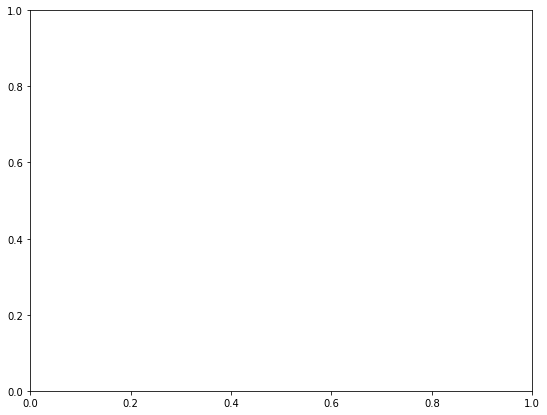

In [8]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(X)

f, ax = plt.subplots(figsize = (9,7))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=y, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('First 2 Principle Components')

ValueError: RGBA values should be within 0-1 range

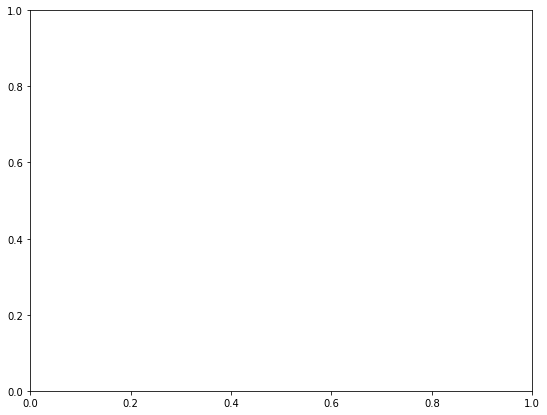

In [9]:
pca = PCA(n_components = 400)
data_pca = pca.fit_transform(X)

f, ax = plt.subplots(figsize = (9,7))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=y, edgecolor='none', alpha=0.5)


B. Plot the first two components. Do you notice any trends? What is the plot showing us?

From this plot we cant really see any trends. This plot is showing us the variance distance between all 400 components.

C. Why would you use PCA? What is it doing? What are the drawbacks?

Essentially using PCA we are reducing the dimensions in the data and while using keeping all maximum amount of variance. So slicing off dimensions while keeping the most amount of variance possible. A draw back of using PCA is its hard to use it to make predictions and to interpret things.

Following the instructions. We then ploted the numbers. Since our X.shape is different than hour x_pca shape we use 28,28 to get the right shape.

In [10]:
# Plotting digits
def plot_digits(data):
    fig, axes = plt.subplots(2, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

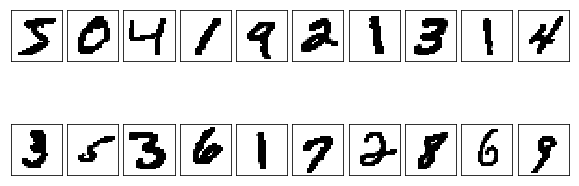

In [11]:
plot_digits(X)

In [12]:
X.shape

(70000, 784)

In [13]:
x_pca.shape

(70000, 784)

We had to reform the plotting function here by changing the reshape to 6,5 to account for the right features.

In [14]:
# Plot digits pertaining to our pca transformation
def plot_digits_pca(data):
    fig, axes = plt.subplots(2, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(6, 5),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

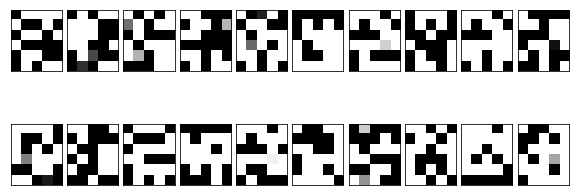

In [15]:
pca = PCA(n_components = 30)
x_pca = pca.fit_transform(X)
plot_digits_pca(x_pca)

D. Plot some of the images, then compress them using PCA and plot again. How does it look?

We really can't tell after we have compressed the data what the numbers are.

# 2. T-SNE

Alright on to number 2, T-SNE

In [16]:
#import package
from sklearn.manifold import TSNE

In [17]:
#Run T-SNE using PCA reduction of dimensionality to help with time. 
rows = np.arange(1797)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.002s...
[t-SNE] Computed neighbors for 1797 samples in 0.254s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 350.975271
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.699341
[t-SNE] KL divergence after 1000 iterations: 1.034993


In [18]:
# Convert T-SNE array results into dataframe
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

Text(0.5, 1.0, 'T-SNE')

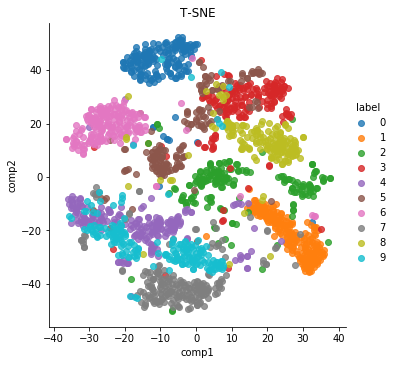

In [19]:
# Plot T-SNE results
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE')

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.002s...
[t-SNE] Computed neighbors for 1797 samples in 0.216s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 294.438090
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.365936
[t-SNE] KL divergence after 1000 iterations: 1.107324


Text(0.5, 1.0, 'T-SNE)')

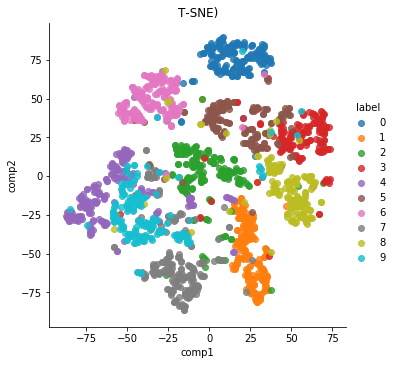

In [21]:
# Plot TSNE with different perplexity
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE)')

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.364s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 350.975271
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.789604
[t-SNE] KL divergence after 1000 iterations: 1.075661


Text(0.5, 1.0, 'T-SNE (Learning Rate 5)')

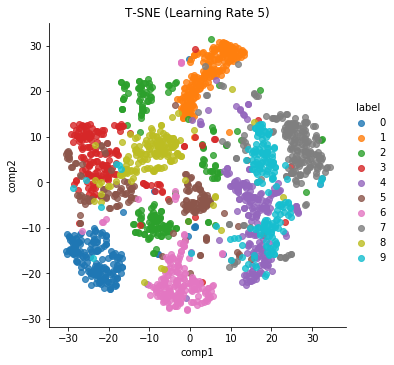

In [35]:
#Plot TSNE with different learning rate
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=8)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE (Learning Rate 5)')

A. How does this plot differ from your PCA plot?

This plot looks a lot more different. We can actually see some separation. 

B. How robust is it to changes in perplexity?

It didnt really make that much of a difference to change the perplexity staying within the range of 5-50.


C. How robust is it to different learning rate and number of iterations?

By changing the learning rate to 8 and number of iterations to 1000 the clusters did get a little tighter but still have some that were not directly assigned to a cluster, atleast visibly



# 3. K- Means Clustering

Alright on to the next part of the hw, K- means clustering

In [23]:
# Import data package
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

When I tried using the orignal data it was taking far too long. So we changed the data from an array to a dataframe and then took a sample of the data.

In [24]:
# Converting dataset to dataframe and taking 1000 sample
X = pd.DataFrame(X)

samplex =X.sample(n=1000)

In [25]:
# Find silhouette score
kmeans = KMeans(n_clusters=10, n_init=50)
kmeans.fit(samplex)
labels = kmeans.labels_
silhouette_score(samplex, labels, metric='euclidean')

0.06246245572387114

A. How did you choose K?

Because the data is a set of numbers ranging from 0-9, 10 seemed like a reasonable K to choose since each number would represent a group.

B. How did you evaluate your clustering?

Described the model using a silhouette score. This value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [32]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(samplex[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = labels[rows[:n_select]]

sns.lmplot(samplex='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('K-Means Clustering')

TypeError: unhashable type: 'numpy.ndarray'

C. Visualize your clusters using T-SNE 

For some reason after taking a sample it still is having problems with the array.

D. Did you scale your data?

Since we are working with just numbers and not anything significantly different, scaling was not applied.

E. How robust is your clustering?

It did a good job in creating clustering. I would say that it's pretty similar to the other techniques that we used already.

# 4. Hierarchical Clustering

Alright here is the last part of the HW, Hierarchical Clustering

In [28]:
# load in data package
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
# create data set with 100 observations
x_cluster = X[:100]

Text(0.5, 1.0, 'Complete Linkage')

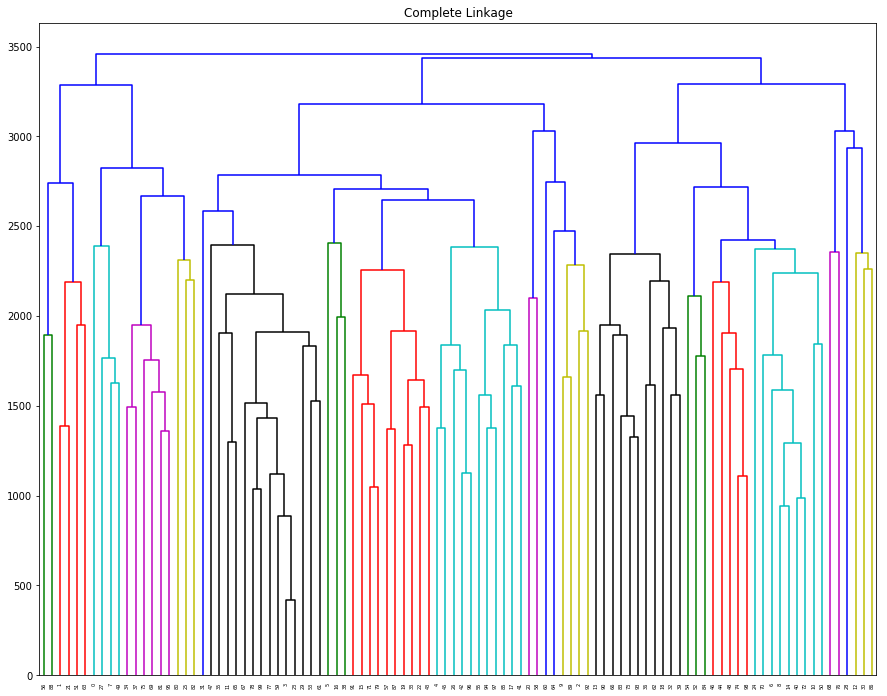

In [30]:
# Plot dendogram with 100 observations
Z = linkage(x_cluster, 'complete')
plt.figure(figsize=(15, 12))
_ = dendrogram(Z)
plt.title('Complete Linkage')

A. Plot your dendrogram

B. How many clusters seem reasonable based off your graph?

If we look at the 3200 mark 10 different clusters is what the dendrogram suggests which looks about right according to the number of K we chose.

Text(0.5, 1.0, 'Single Linkage')

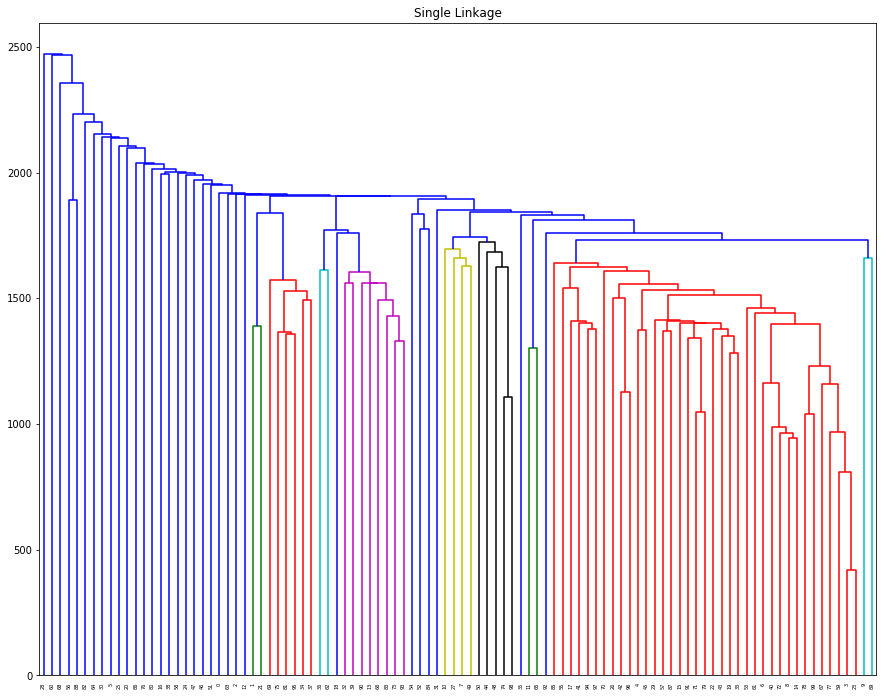

In [40]:
Z = linkage(x_cluster, 'single')
plt.figure(figsize=(15, 12))
_ = dendrogram(Z)
plt.title('Single Linkage')

Text(0.5, 1.0, 'Centroid Linkage')

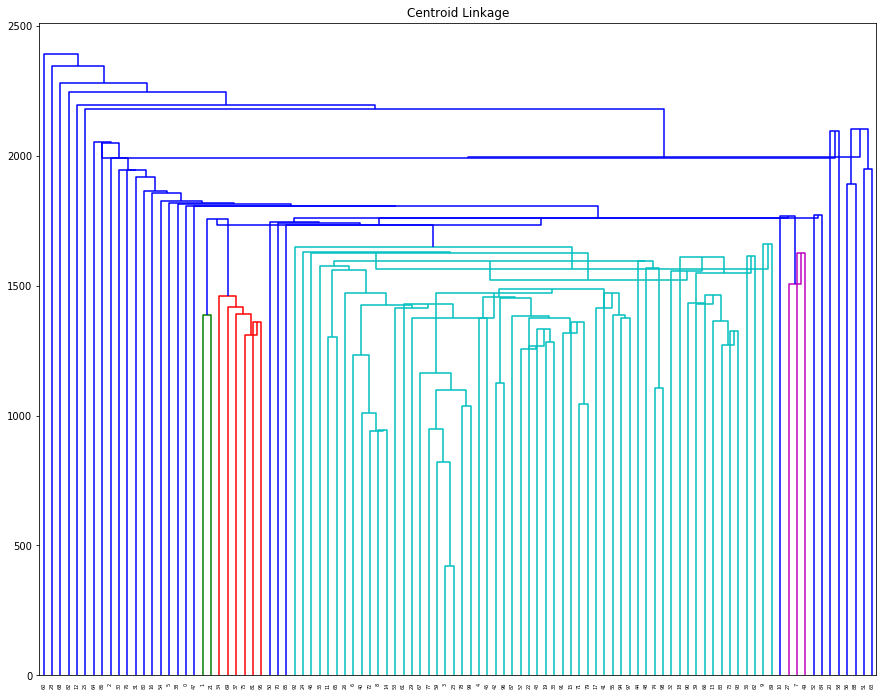

In [42]:
Z = linkage(x_cluster, 'centroid')
plt.figure(figsize=(15, 12))
_ = dendrogram(Z)
plt.title('Centroid Linkage')

Text(0.5, 1.0, 'Weighted Linkage')

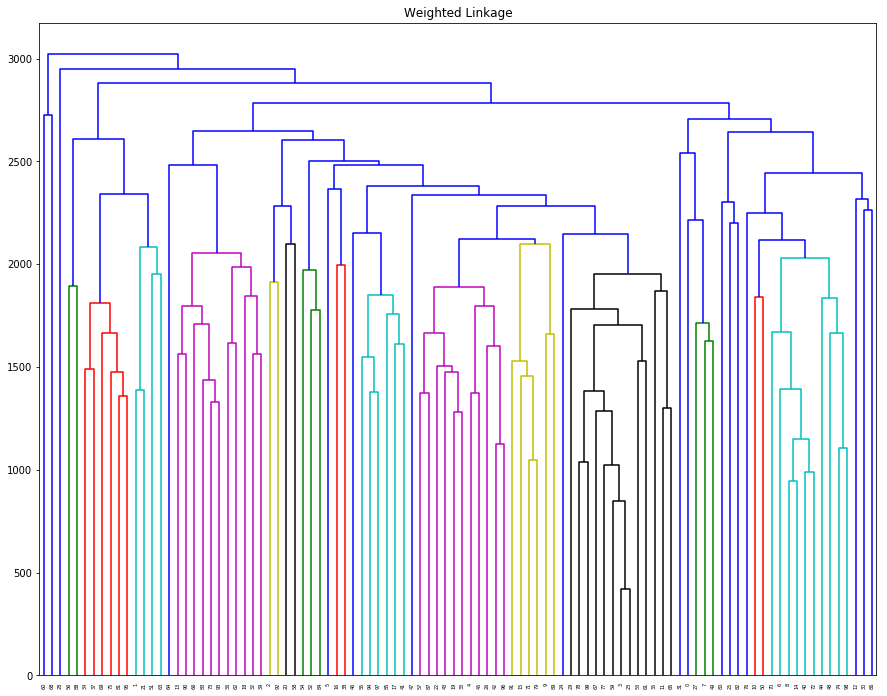

In [43]:
Z = linkage(x_cluster, 'weighted')
plt.figure(figsize=(15, 12))
_ = dendrogram(Z)
plt.title('Weighted Linkage')

C. How does your dendrogram change with different linkage methods?

Single Linkage: 

With single linkages it looks like it just coverges in an order of what is the nearest point and then just builds up to a single chain. It's a bit messy and suggests a lot more linkages

Centroid Linkage:

I think in this dendrogram there is a central point that the linkages are trying to find a connection to. It's super messy and it's hard to tell how many linkages are suggested

Weighted Lingage:

Its not as bad as the other two and at the 2500 mark it suggest 12 linkages.